In [1]:
#import statements
import os
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
#read csv into DF
FIFA_df = pd.read_csv('FIFA_data.csv', encoding = "ISO-8859-1", engine='python')
FIFA_df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72M,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,$355,...,79,88,68,58,51,15,13,5,10,13


In [4]:
#clean DF
FIFA_data_df = FIFA_df.drop(columns = ["No", "ID", "Nationality", "Club", "International Reputation", "Jersey Number", "Joined", "Contract Valid Until"])
FIFA_data_df.head()

,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,110.5M,$565,Left,4,4,Medium/ Medium,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,94,94,77M,$405,Right,4,5,High/ Low,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,92,93,118.5M,$290,Right,5,5,High/ Medium,...,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,91,93,72M,$260,Right,3,1,Medium/ Medium,...,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,91,92,102M,$355,Right,5,4,High/ High,...,79,88,68,58,51,15,13,5,10,13


In [5]:
FIFA_data_df["Value"] = FIFA_data_df["Value"].str.replace("M", "")

In [6]:
FIFA_data_df["Value"] = FIFA_data_df["Value"].str.replace("", "")

In [7]:
FIFA_data_df["Value"] = FIFA_data_df["Value"].str.replace(".", "")

In [8]:
FIFA_data_df["Value"]

0      1105
1        77
2      1185
3        72
4       102
       ... 
496     175
497     155
498      15
499      16
500       9
Name: Value, Length: 501, dtype: object

In [9]:
FIFA_data_df["Value"] = FIFA_data_df["Value"].astype(int)

In [10]:
FIFA_data_df["Value"] = 1000000 * FIFA_data_df["Value"].round(decimals = 1)

In [11]:
FIFA_data_df["Wage"] = FIFA_data_df["Wage"].str.replace("$", "")

In [12]:
FIFA_data_df["Wage"] = FIFA_data_df["Wage"].astype(int)

In [13]:
FIFA_data_df.head()

,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,1105000000,565,Left,4,4,Medium/ Medium,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,94,94,77000000,405,Right,4,5,High/ Low,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,92,93,1185000000,290,Right,5,5,High/ Medium,...,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,91,93,72000000,260,Right,3,1,Medium/ Medium,...,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,91,92,102000000,355,Right,5,4,High/ High,...,79,88,68,58,51,15,13,5,10,13


In [14]:
FIFA_data_df["Value"]

0      1105000000
1        77000000
2      1185000000
3        72000000
4       102000000
          ...    
496     175000000
497     155000000
498      15000000
499      16000000
500       9000000
Name: Value, Length: 501, dtype: int64

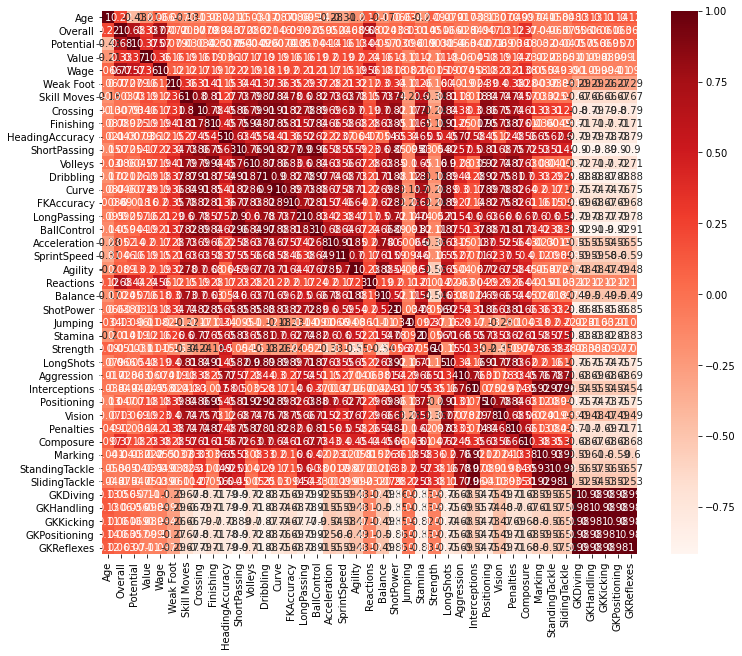

In [15]:
plt.figure(figsize= (12,10))
cor = FIFA_data_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [16]:
#correlation with output variable
cor_target = abs(cor["Value"])
cor_target

Age                0.211298
Overall            0.330950
Potential          0.366557
Value              1.000000
Wage               0.357319
Weak Foot          0.157695
Skill Moves        0.191259
Crossing           0.158552
Finishing          0.193686
HeadingAccuracy    0.035550
ShortPassing       0.172860
Volleys            0.166110
Dribbling          0.189006
Curve              0.185844
FKAccuracy         0.164643
LongPassing        0.159817
BallControl        0.187747
Acceleration       0.197970
SprintSpeed        0.186075
Agility            0.203207
Reactions          0.241572
Balance            0.162032
ShotPower          0.129461
Jumping            0.108579
Stamina            0.118035
Strength           0.106486
LongShots          0.178950
Aggression         0.060281
Interceptions      0.045463
Positioning        0.184113
Vision             0.186616
Penalties          0.142313
Composure          0.230770
Marking            0.022394
StandingTackle     0.035493
SlidingTackle      0

In [17]:
FIFA_data_df1 = FIFA_data_df[FIFA_data_df.columns[FIFA_data_df.columns.isin(["Age", "Overall", "Preferred Foot", "Potential", "Value", "Wage", "Perferred Foot", "Agility", "Reactions", "Composure"])]]
FIFA_data_df1

,Age,Overall,Potential,Value,Wage,Preferred Foot,Agility,Reactions,Composure
0,31,94,94,1105000000,565,Left,91,95,96
1,33,94,94,77000000,405,Right,87,96,95
2,26,92,93,1185000000,290,Right,96,94,94
3,27,91,93,72000000,260,Right,60,90,68
4,27,91,92,102000000,355,Right,79,91,88
...,...,...,...,...,...,...,...,...,...
496,26,80,81,175000000,52,Right,81,74,75
497,27,80,80,155000000,30,Left,69,79,65
498,28,80,80,15000000,59,Left,85,78,78
499,27,80,80,16000000,23,Right,58,81,77


In [18]:
FIFA_data_df2 = pd.get_dummies(FIFA_data_df1)
FIFA_data_df2

,Age,Overall,Potential,Value,Wage,Agility,Reactions,Composure,Preferred Foot_Left,Preferred Foot_Right
0,31,94,94,1105000000,565,91,95,96,1,0
1,33,94,94,77000000,405,87,96,95,0,1
2,26,92,93,1185000000,290,96,94,94,0,1
3,27,91,93,72000000,260,60,90,68,0,1
4,27,91,92,102000000,355,79,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...
496,26,80,81,175000000,52,81,74,75,0,1
497,27,80,80,155000000,30,69,79,65,1,0
498,28,80,80,15000000,59,85,78,78,1,0
499,27,80,80,16000000,23,58,81,77,0,1


In [19]:
#1 = Preferred Left Foot, 0 = Preferred Right Foot
FIFA_data_df_final = FIFA_data_df2.drop(columns = ["Preferred Foot_Right"])
FIFA_data_df_final

,Age,Overall,Potential,Value,Wage,Agility,Reactions,Composure,Preferred Foot_Left
0,31,94,94,1105000000,565,91,95,96,1
1,33,94,94,77000000,405,87,96,95,0
2,26,92,93,1185000000,290,96,94,94,0
3,27,91,93,72000000,260,60,90,68,0
4,27,91,92,102000000,355,79,91,88,0
...,...,...,...,...,...,...,...,...,...
496,26,80,81,175000000,52,81,74,75,0
497,27,80,80,155000000,30,69,79,65,1
498,28,80,80,15000000,59,85,78,78,1
499,27,80,80,16000000,23,58,81,77,0


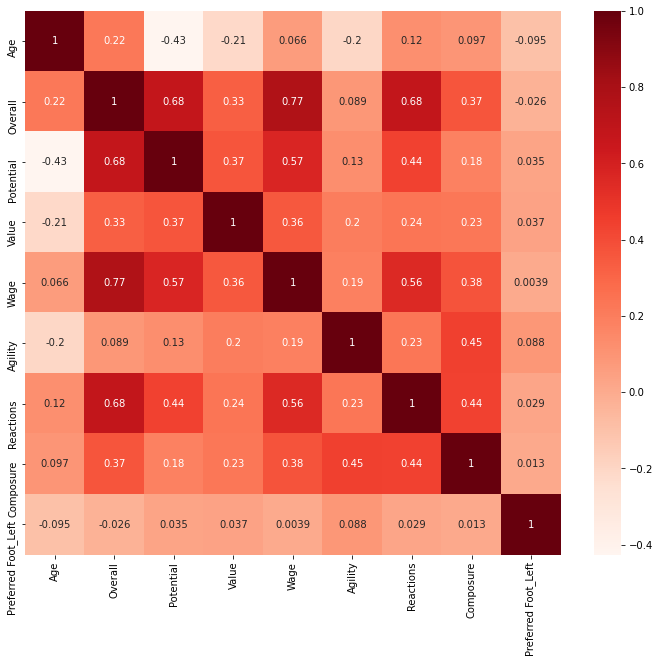

In [20]:
plt.figure(figsize= (12,10))
cor = FIFA_data_df_final.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [21]:
#correlation with output variable
cor_target = abs(cor["Value"])
cor_target

Age                    0.211298
Overall                0.330950
Potential              0.366557
Value                  1.000000
Wage                   0.357319
Agility                0.203207
Reactions              0.241572
Composure              0.230770
Preferred Foot_Left    0.036666
Name: Value, dtype: float64

In [22]:
FIFA_data_df_final.describe()

,Age,Overall,Potential,Value,Wage,Agility,Reactions,Composure,Preferred Foot_Left
count,501.000000,501.000000,501.000000,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000
mean,27.199601,82.894212,84.812375,1.380080e+08,93.101796,71.155689,80.678643,77.093812,0.261477
std,3.626028,2.689756,3.228115,1.631824e+08,76.392013,14.762781,4.182167,8.215180,0.439878
min,18.000000,80.000000,80.000000,0.000000e+00,0.000000,29.000000,66.000000,20.000000,0.000000
25%,25.000000,81.000000,82.000000,2.100000e+07,40.000000,61.000000,78.000000,74.000000,0.000000
50%,27.000000,82.000000,84.000000,5.500000e+07,73.000000,74.000000,81.000000,78.000000,0.000000
75%,30.000000,84.000000,87.000000,2.150000e+08,125.000000,82.000000,83.000000,82.000000,1.000000
max,40.000000,94.000000,95.000000,1.185000e+09,565.000000,96.000000,96.000000,96.000000,1.000000


In [24]:
#Assign the data to x and y

X = FIFA_data_df_final[["Age", "Overall", "Potential", "Agility", "Reactions", "Composure", "Wage", "Preferred Foot_Left"]]

y = FIFA_data_df_final["Value"].values.reshape(-1,1)

print(X.shape, y.shape)

(501, 8) (501, 1)


In [25]:
#use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [26]:
#Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.23591257521274978
Testing Score: 0.1766346751186233


In [28]:
#score the model
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.22152047043030243


Text(0.5, 1.0, 'Residual Plot')

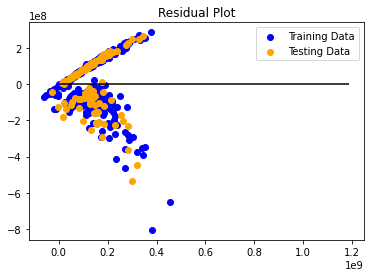

In [29]:
#Plot the Residuals for the Training and Testing Data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [30]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [31]:
Intercept = reg.intercept_
Coefficients = reg.coef_

In [32]:
Intercept

array([-8.77264626e+08])

In [33]:
Coefficients

array([[-15917045.04646543,  23934834.49659535,  -6658374.10306276,
           665593.89040618,  -2317480.09387096,   1809658.44437282,
           298298.98857944,   4542982.88655868]])